## BUSS6002 Assignment 2

In [1]:
# Load the libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse 
import warnings

warnings.filterwarnings('ignore')


# Read in the data file
# 1. 在使用每一个不同的model时再次load数据
data = pd.read_csv(
    'AmesHousing.txt',
    sep='\t',
    keep_default_na=False,
    na_values=[''])

Correlation between numerical data and Sales price

In [2]:
missing= data.isna().sum().sort_values(ascending = False)
get_all_missing_values = missing[missing>0]
print(get_all_missing_values)

Lot Frontage      490
Garage Yr Blt     159
Mas Vnr Area       23
Mas Vnr Type       23
Bsmt Exposure       4
Garage Finish       2
BsmtFin Type 2      2
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Qual         1
Garage Cond         1
Bsmt Cond           1
BsmtFin Type 1      1
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Garage Cars         1
Garage Area         1
Bsmt Qual           1
Total Bsmt SF       1
Electrical          1
dtype: int64


In [3]:
# 注释的convention
# reomve null value for Total Bsmt SF
# dropna inplace关键字的使用
data.dropna(subset=['Total Bsmt SF'], inplace=True)

In [4]:
data['Total Living SF'] = data['Gr Liv Area'] + data['Total Bsmt SF'] 
data['Total Living Overall Qual']= data['Total Living SF'] * data['Overall Qual'] 
data['Total Bath'] = data['Full Bath'] + 0.5 * data['Half Bath']
data['Total Bath Liv Area'] = data['Gr Liv Area']*data['Total Bath']
data['House Age'] = data['Yr Sold']- data['Year Built']

In [5]:
quantitative = [f for f in data.columns if data.dtypes[f] != 'object']
quantitative.remove('PID')
quantitative.remove('Order')
a_corr =data[quantitative].corr()['SalePrice'].sort_values(ascending = False).round(2).drop("SalePrice")
print(a_corr)

Total Living Overall Qual    0.87
Overall Qual                 0.80
Total Living SF              0.79
Gr Liv Area                  0.71
Total Bath Liv Area          0.69
Garage Cars                  0.65
Garage Area                  0.64
Total Bsmt SF                0.63
1st Flr SF                   0.62
Total Bath                   0.58
Year Built                   0.56
Full Bath                    0.55
Year Remod/Add               0.53
Garage Yr Blt                0.53
Mas Vnr Area                 0.51
TotRms AbvGrd                0.50
Fireplaces                   0.47
BsmtFin SF 1                 0.43
Lot Frontage                 0.36
Wood Deck SF                 0.33
Open Porch SF                0.31
Half Bath                    0.28
Bsmt Full Bath               0.28
2nd Flr SF                   0.27
Lot Area                     0.27
Bsmt Unf SF                  0.18
Bedroom AbvGr                0.14
Screen Porch                 0.11
Pool Area                    0.07
Mo Sold       

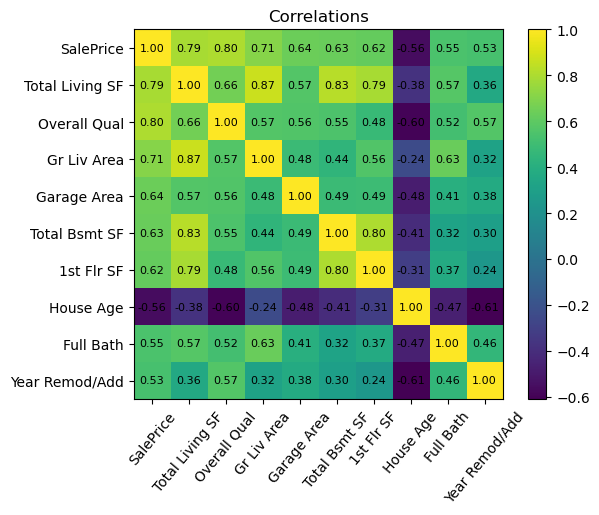

In [6]:
# Capstone: 用计算机来选择一组最佳的指标
b= data[['SalePrice','Total Living SF','Overall Qual','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','House Age','Full Bath','Year Remod/Add']].corr()

n_var = len(b)

plt.imshow(b, cmap = 'viridis')

plt.xticks(range(n_var), b.columns,fontsize = 10,rotation = 50)
plt.yticks(range(n_var), b.columns,fontsize = 10)

for i in range(n_var):
    for j in range(n_var):
        plt.text(i, j, '{:.2f}'.format(b.iloc[i, j]), ha="center", va="center", color="k", fontsize = 8)

plt.colorbar()
plt.title('Correlations')
plt.savefig('Correlations')

In [7]:
#Check the number of different catogory-Overall Qual
data['Overall Qual'].value_counts()

5     825
6     732
7     602
8     350
4     225
9     107
3      40
10     31
2      13
1       4
Name: Overall Qual, dtype: int64

In [8]:
# Constructinting M1 Model
# 变量的作用域
# 如何写好一个函数
def lr_on_one_variable(name: str, label_unit: str):
    data.dropna(subset=[name], inplace=True)
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
    plt.figure(figsize = (6,3))
    x= data[name]
    y= data['SalePrice']
    plt.scatter(x,y,s=8,label= 'scatter plot')
    a,b = np.polyfit(x,y,1)
    y1= a*x+b
    plt.plot(x, y1, color = 'orange',label= 'regression line')
    plt.xlabel('{}({})'.format(name, label_unit))
    plt.ylabel('Sale Price($)')
    plt.title("Sale Price vs {}".format(name),fontsize = 15)
    plt.legend()
    plt.show()


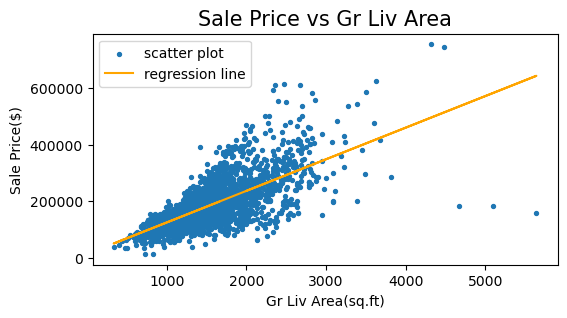

In [9]:
lr_on_one_variable('Gr Liv Area', 'sq.ft')

In [10]:
data.drop(data[data['Gr Liv Area'] > 4000].index, inplace=True)

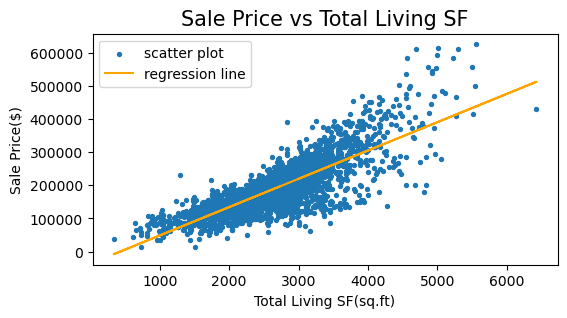

In [11]:
lr_on_one_variable('Total Living SF', 'sq.ft')

In [12]:
data.drop(data[data['Total Living SF'] > 6000].index, inplace=True)

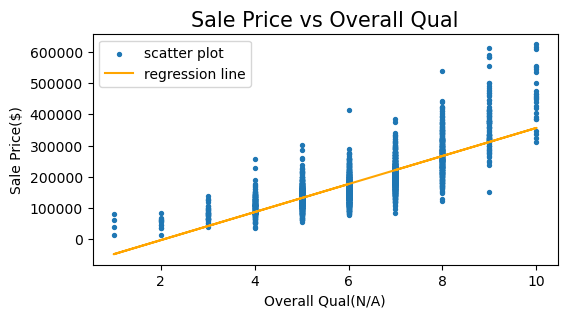

In [13]:
lr_on_one_variable('Overall Qual','N/A')

In [14]:
M1_names = ['Total Living SF','Total Living Overall Qual','Overall Qual']

In [15]:
def get_names_label(names: list[str]):
    result = 'MSE for '
    result += ', '.join(names)
    #https://www.w3schools.com/python/ref_string_join.asp
    result += ': {:.2f}'
    return result

In [16]:
def MSE_on_mult_variable(names: list[str]):
    X = data[names].to_numpy()
    y = data['SalePrice']
    Linear=LinearRegression()
    Linear.fit(X.reshape(-1,len(names)),y)

    y_pred = Linear.predict(X)
    variable_mse = mse(y,y_pred) 
    print(get_names_label(names).format(variable_mse))

In [17]:
MSE_on_mult_variable(['Total Living SF','Overall Qual'])

MSE for Total Living SF, Overall Qual: 1237705043.25


In [18]:
MSE_on_mult_variable(M1_names)

MSE for Total Living SF, Total Living Overall Qual, Overall Qual: 878987047.54


In [19]:
#Constructinting M2 Model
data['PricePerSF'] = data['SalePrice']/data['Total Living SF']
a= data.groupby('Neighborhood', as_index=True)['PricePerSF'].mean().sort_values(ascending = False).round(2)
a

Neighborhood
GrnHill    143.73
StoneBr     90.20
NridgHt     89.11
Greens      85.95
NoRidge     83.10
Somerst     82.41
Timber      79.59
Gilbert     77.19
Veenker     77.13
Blueste     76.76
CollgCr     76.05
Crawfor     75.61
Blmngtn     72.44
ClearCr     71.38
SawyerW     71.01
Landmrk     70.26
Mitchel     68.77
NWAmes      66.42
Sawyer      66.23
NPkVill     65.21
NAmes       64.49
BrkSide     63.71
Edwards     63.56
BrDale      63.48
MeadowV     57.83
OldTown     57.26
SWISU       56.25
IDOTRR      54.67
Name: PricePerSF, dtype: float64

In [20]:
# Allocate dummy variables for M2 by price 
Group_1=['GrnHill','StoneBr','NridgHt','Greens','NoRidge','Somerst']
Group_2=['Timber','Gilbert','Veenker','Blueste','CollgCr','Crawfor','Blmngtn','ClearCr','SawyerW','Landmrk']
Group_3=['Mitchel','NWAmes','Sawyer','NPkVill','NAmes','BrkSide','Edwards','BrDale','MeadowV','OldTown','SWISU','IDOTRR']
data['G2_Dummy']=0
data['G3_Dummy']=0

for i in range(data['Neighborhood'].count()):
    if data['Neighborhood'].iloc [i] in Group_2:
        data['G2_Dummy']=1

for i in range(data['Neighborhood'].count()):
    if data['Neighborhood'].iloc [i] in Group_3:
        data['G3_Dummy'].iloc[i]=1
data['Total Living SF_G2'] = data['Total Living SF'] * data['G2_Dummy']
data['Total Living SF_G3'] = data['Total Living SF'] * data['G3_Dummy'] 

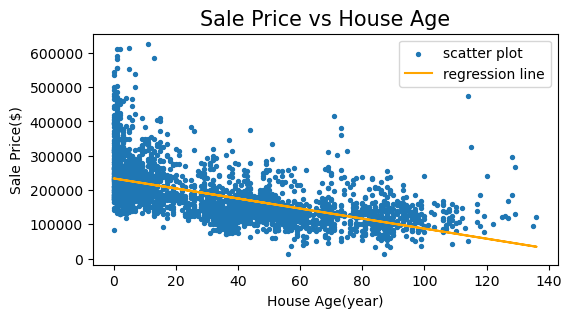

In [21]:
lr_on_one_variable('House Age', 'year')

In [22]:
M2_names= ['Total Living SF','Total Living Overall Qual','Overall Qual', 'House Age','Total Living SF_G2','Total Living SF_G3']

In [23]:
MSE_on_mult_variable(M2_names)

MSE for Total Living SF, Total Living Overall Qual, Overall Qual, House Age, Total Living SF_G2, Total Living SF_G3: 763629696.52


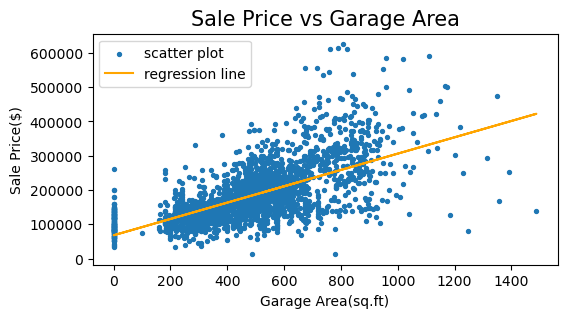

In [24]:
# Constructinting M3 Model
lr_on_one_variable('Garage Area', 'sq.ft')

In [25]:
data.drop(data[data['Garage Area']==0].index, inplace=True)

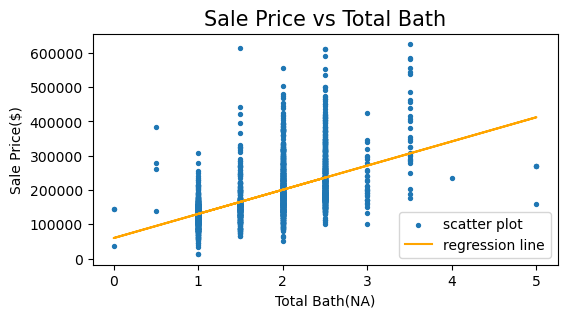

In [26]:
lr_on_one_variable('Total Bath', 'NA')

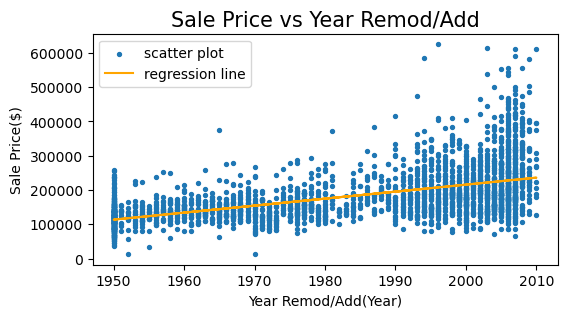

In [27]:
lr_on_one_variable('Year Remod/Add', 'Year')

In [28]:
data.drop(data[data['Year Remod/Add']==1950].index, inplace=True)

In [29]:
M3_names=['Total Living SF','Total Living Overall Qual','Overall Qual', 'House Age','Total Living SF_G2','Total Living SF_G3', 'Garage Area','Year Remod/Add']

In [30]:
MSE_on_mult_variable(M3_names)

MSE for Total Living SF, Total Living Overall Qual, Overall Qual, House Age, Total Living SF_G2, Total Living SF_G3, Garage Area, Year Remod/Add: 735259197.04


In [31]:
data[['Total Living SF','Total Living Overall Qual','Overall Qual', 'House Age','Total Living SF_G2','Total Living SF_G3', 'Garage Area','Year Remod/Add']].corr()

,Total Living SF,Total Living Overall Qual,Overall Qual,House Age,Total Living SF_G2,Total Living SF_G3,Garage Area,Year Remod/Add
Total Living SF,1.000000,0.925895,0.654598,-0.354438,1.000000,-0.158962,0.600632,0.311422
Total Living Overall Qual,0.925895,1.000000,0.868804,-0.480970,0.925895,-0.341896,0.644126,0.443827
Overall Qual,0.654598,0.868804,1.000000,-0.582477,0.654598,-0.494444,0.546370,0.548618
House Age,-0.354438,-0.480970,-0.582477,1.000000,-0.354438,0.609922,-0.431269,-0.477242
Total Living SF_G2,1.000000,0.925895,0.654598,-0.354438,1.000000,-0.158962,0.600632,0.311422
Total Living SF_G3,-0.158962,-0.341896,-0.494444,0.609922,-0.158962,1.000000,-0.269697,-0.517579
Garage Area,0.600632,0.644126,0.546370,-0.431269,0.600632,-0.269697,1.000000,0.326255
Year Remod/Add,0.311422,0.443827,0.548618,-0.477242,0.311422,-0.517579,0.326255,1.000000


### Model Selection

In [32]:
# def Model_on_several_variable(names: list[str]):
#     X= data[names].to_numpy()
#     y = data['SalePrice']
#     Linear=LinearRegression()
#     Linear.fit(X.reshape(-1,len(names)),y)
#     r_squared = Linear.score(X, y)
#     for i in range(len(names)):
#         print('Coefficient for {}: {:.2f}'.format(names[i], Linear.coef_[i]))
#     print('Intercept for the equation: {:.2f}'.format(Linear.intercept_))
#     print('R square for the equation: {:.2f}'.format(r_squared))

In [33]:
X= data.drop('SalePrice',axis=1)
y = data['SalePrice']
X_train, X_Valtest, y_train, y_Valtest = train_test_split(X, y, test_size = 0.2, random_state = 10)
X_val, X_test, y_val, y_test = train_test_split(X_Valtest, y_Valtest, test_size = 0.25, random_state = 10)

In [34]:
# train-validation-test
def Train_val_test_on_Model(names: list[str]) :
    
    x1_train = X_train[names].to_numpy().reshape(-1,len(names)) 
    x1_val = X_val[names].to_numpy().reshape(-1,len(names)) 
    x1_test = X_test[names].to_numpy().reshape(-1,len(names)) 
    Linear=LinearRegression()
    Linear.fit(x1_train,y_train)
    y_predict = Linear.predict(x1_train)
    residuals = y_train - y_predict
    r_squared = Linear.score(x1_train,y_train)

    MSE_val = mse(y_val, Linear.predict(x1_val))
    MSE_train = mse(y_train, y_predict)
    MSE_test = mse(y_test, Linear.predict(x1_test))

    for i in range(len(names)):
        print('Coefficient for {}: {:.2f}'.format(names[i], Linear.coef_[i]))
    print('Intercept for the equation: {:.2f}'.format(Linear.intercept_))
    print('R square for the equation: {:.2f}'.format(r_squared))
    print("MSE for Validation: {:.2f}".format(MSE_val))
    print("MSE for Train: {:.2f}".format(MSE_train))
    print("MSE for Test: {:.2f}".format(MSE_test))

In [35]:
def OLS_Regression_Model(names: list[str]):
    # http://net-informations.com/ds/mla/ols.htm
    x_OLS = X_train[names].to_numpy().reshape(-1,len(names))
    x_OLS_constant = sm.add_constant(x_OLS) 
    OLS=sm.OLS(y_train, x_OLS_constant)
    OLS=OLS.fit()
    print(OLS.summary())

### Model 1

In [36]:
# Model_on_several_variable(M1_names)

In [37]:
Train_val_test_on_Model(M1_names)

Coefficient for Total Living SF: -51.43
Coefficient for Total Living Overall Qual: 16.20
Coefficient for Overall Qual: -18365.60
Intercept for the equation: 164237.41
R square for the equation: 0.86
MSE for Validation: 758506962.85
MSE for Train: 874978477.37
MSE for Test: 855545156.86


In [38]:
M1_train_MSE = 874978477.37
M1_Valid_MSE = 758506962.85

In [39]:
OLS_Regression_Model(M1_names)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3891.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        03:38:40   Log-Likelihood:                -22994.
No. Observations:                1963   AIC:                         4.600e+04
Df Residuals:                    1959   BIC:                         4.602e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.642e+05   1.08e+04     15.231      0.0

### Model 2

In [40]:
#Model_on_several_variable(M2_names)

In [41]:
Train_val_test_on_Model(M2_names)

Coefficient for Total Living SF: -22.16
Coefficient for Total Living Overall Qual: 15.72
Coefficient for Overall Qual: -23822.77
Coefficient for House Age: -176.76
Coefficient for Total Living SF_G2: -22.16
Coefficient for Total Living SF_G3: -7.11
Intercept for the equation: 201475.69
R square for the equation: 0.87
MSE for Validation: 715344136.18
MSE for Train: 778734232.84
MSE for Test: 785044124.14


In [42]:
M2_train_MSE = 778734232.84
M2_Valid_MSE = 715344136.18

In [43]:
OLS_Regression_Model(M2_names)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     2669.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        03:38:40   Log-Likelihood:                -22880.
No. Observations:                1963   AIC:                         4.577e+04
Df Residuals:                    1957   BIC:                         4.581e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.015e+05   1.08e+04     18.627      0.0

### Model 3

In [44]:
#Model_on_several_variable(M3_names)

In [45]:
Train_val_test_on_Model(M3_names)

Coefficient for Total Living SF: -22.37
Coefficient for Total Living Overall Qual: 15.29
Coefficient for Overall Qual: -24805.06
Coefficient for House Age: -121.69
Coefficient for Total Living SF_G2: -22.37
Coefficient for Total Living SF_G3: -5.75
Coefficient for Garage Area: 32.59
Coefficient for Year Remod/Add: 302.24
Intercept for the equation: -404944.20
R square for the equation: 0.88
MSE for Validation: 707095192.59
MSE for Train: 742279480.39
MSE for Test: 730386451.83


In [46]:
M3_train_MSE = 742279480.39
M3_Valid_MSE = 707095192.59

In [47]:
OLS_Regression_Model(M3_names)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     2011.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        03:38:40   Log-Likelihood:                -22833.
No. Observations:                1963   AIC:                         4.568e+04
Df Residuals:                    1955   BIC:                         4.573e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.049e+05   9.03e+04     -4.484      0.0

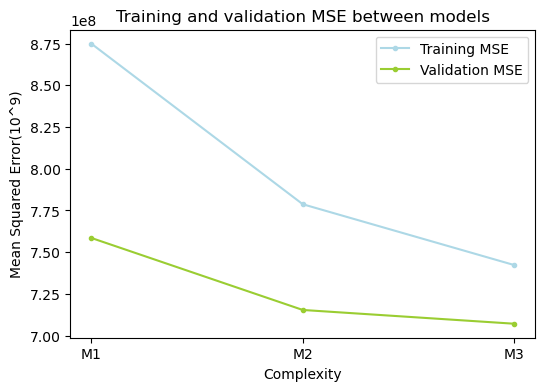

In [48]:
Model = ['M1','M2', 'M3']
Train_data = [M1_train_MSE,M2_train_MSE,M3_train_MSE]
Validation_data= [M1_Valid_MSE,M2_Valid_MSE,M3_Valid_MSE]

plt.figure(figsize = (6,4))
plt.plot(Model, Train_data, '.-', color = 'lightblue', label='Training MSE')
plt.plot(Model, Validation_data, '.-', color = 'yellowgreen', label='Validation MSE')

plt.xlabel('Complexity')
plt.ylabel('Mean Squared Error(10^9)')
plt.title('Training and validation MSE between models',fontsize = 12)
plt.legend()

plt.savefig('Training and validation MSE between models')

In [49]:
def residuals_graph(names: list[str]) :
    x1_train = X_train[names].to_numpy().reshape(-1,len(names)) 
    x1_val = X_val[names].to_numpy().reshape(-1,len(names)) 
    x1_test = X_test[names].to_numpy().reshape(-1,len(names)) 
    Linear=LinearRegression()
    Linear.fit(x1_train,y_train)
    y_predict = Linear.predict(x1_train)
    residuals = y_train - y_predict
    plt.figure(figsize = (6,4))
    plt.scatter(y_predict, residuals)
    
    plt.xlabel('y_predict')
    plt.ylabel('residual')
    plt.title('residual vs y_predict', fontsize = 12)
    plt.savefig('residual vs y_predict for {}'.format(len(names)))
    
    plt.figure(figsize = (6,4))
    plt.scatter(y_predict, residuals**2)
    plt.xlabel('y_predict')
    plt.ylabel('residual**2')
    plt.title('residual**2 vs y_predict', fontsize = 12)
    plt.savefig('residual**2 vs y_predict for {}'.format(len(names)))

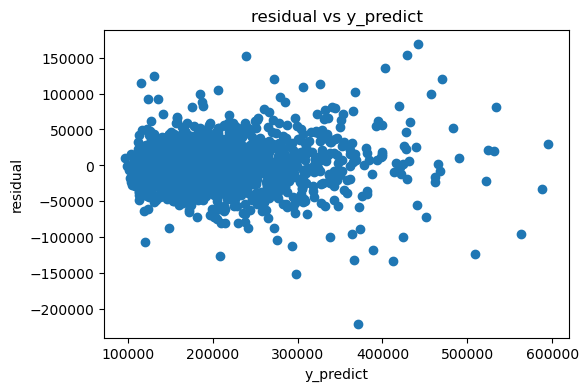

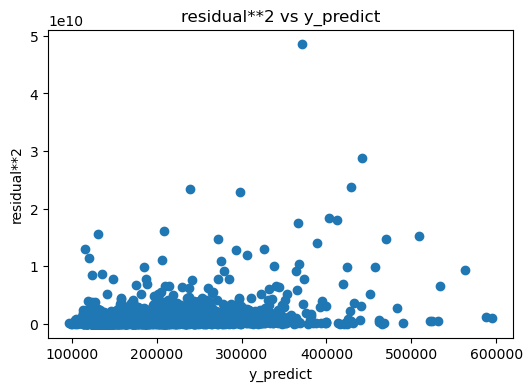

In [50]:
residuals_graph(M1_names)

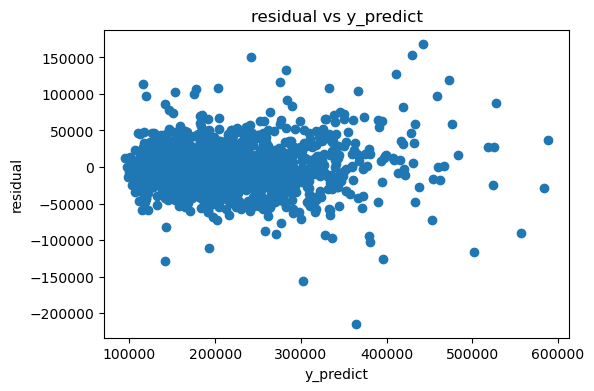

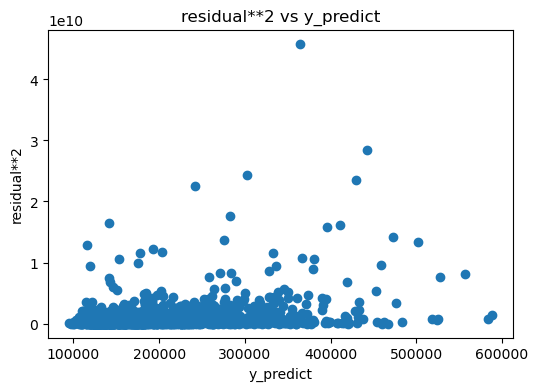

In [51]:
residuals_graph(M2_names)

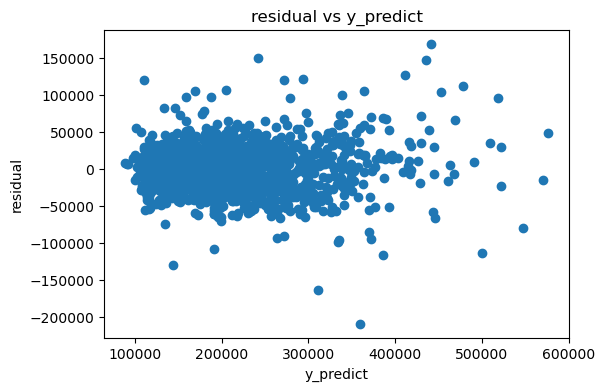

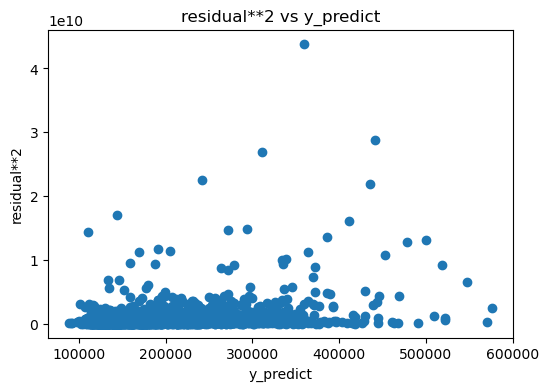

In [52]:
residuals_graph(M3_names)

In [53]:
#Benchmark
Benchmark1_pred = y_Valtest.mean()
print("prediction for Benchmark 1 : {:.2f}".format(Benchmark1_pred))

prediction for Benchmark 1 : 191561.34


In [54]:
Valtest = X_Valtest
Valtest['Price']= y_Valtest
SalePrice_by_Neigh = Valtest.groupby('Neighborhood').mean()['Price']

In [55]:
Valtest

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Total Living Overall Qual,Total Bath,Total Bath Liv Area,House Age,PricePerSF,G2_Dummy,G3_Dummy,Total Living SF_G2,Total Living SF_G3,Price
1890,1891,534401120,20,RL,80.0,8800,Pave,NA,Reg,Lvl,...,16618.0,2.0,2400.0,41,68.871104,1,1,2374.0,2374.0,163500
2295,2296,923230010,60,RL,68.0,8286,Pave,NA,IR1,Lvl,...,10740.0,1.5,2148.0,30,73.091248,1,1,2148.0,2148.0,157000
869,870,907275010,20,RL,90.0,15750,Pave,NA,Reg,Lvl,...,23800.0,2.0,3026.0,10,73.949580,1,0,2975.0,0.0,220000
1790,1791,528441080,20,RL,75.0,10084,Pave,NA,Reg,Lvl,...,27040.0,2.0,3388.0,3,90.828402,1,0,3380.0,0.0,307000
99,100,533213030,20,FV,NaN,4403,Pave,NA,IR2,Lvl,...,20636.0,2.5,3695.0,1,75.305292,1,0,2948.0,0.0,222000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,1159,533125140,60,RL,105.0,11025,Pave,NA,Reg,Lvl,...,41706.0,2.5,6965.0,15,80.384117,1,0,4634.0,0.0,372500
11,12,527165230,20,RL,NaN,7980,Pave,NA,IR1,Lvl,...,14130.0,2.0,2374.0,18,78.556263,1,0,2355.0,0.0,185000
1900,1901,534431020,45,RL,85.0,12172,Pave,NA,Reg,Lvl,...,8650.0,1.0,908.0,67,80.057803,1,1,1730.0,1730.0,138500
1193,1194,534202130,20,RL,72.0,8872,Pave,NA,Reg,Lvl,...,9120.0,1.0,912.0,43,80.592105,1,1,1824.0,1824.0,147000


In [56]:
X_test['Benchmark2_pred'] = X_test['Neighborhood'].replace(dict(SalePrice_by_Neigh))

In [57]:
test = X_test
test['Real']=y_test
test['Benchmark1_pred']= Benchmark1_pred
test['Benchmark2_pred']= X_test['Benchmark2_pred']

In [58]:
x1_Valtest = X_Valtest[M3_names].to_numpy().reshape(-1,len(M3_names)) 

Linear=LinearRegression()
Linear.fit(x1_Valtest,y_Valtest)

x1_test =X_test[M3_names].to_numpy()
y_predict = Linear.predict(x1_test)


In [59]:
test['Predict_Model'] = y_predict
test[['Real','Benchmark1_pred','Benchmark2_pred','Predict_Model']]

,Real,Benchmark1_pred,Benchmark2_pred,Predict_Model
1860,373000,191561.340122,261908.333333,392995.824505
2060,127000,191561.340122,137186.640000,123504.348509
909,197000,191561.340122,153858.500000,254848.761787
1743,226500,191561.340122,222426.333333,256510.685425
1618,169000,191561.340122,188910.034483,183286.880549
...,...,...,...,...
1532,188700,191561.340122,196965.789474,165580.183930
334,157900,191561.340122,165177.440000,134880.587381
1044,89500,191561.340122,102033.333333,112606.929209
191,128500,191561.340122,133029.687500,151024.527162


In [60]:
BM1_MSE = mse(test['Real'],test['Benchmark1_pred'])
BM2_MSE = mse(test['Real'],test['Benchmark2_pred'])
Predict_Model_MSE = mse(test['Real'],test['Predict_Model'])
print('MSE for BM1: {:.2f}'.format(BM1_MSE))
print('MSE for BM2: {:.2f}'.format(BM2_MSE))
print('MSE for Selected Model: {:.2f}'.format(Predict_Model_MSE))


MSE for BM1: 5971419329.04
MSE for BM2: 2374901271.41
MSE for Selected Model: 689817311.81


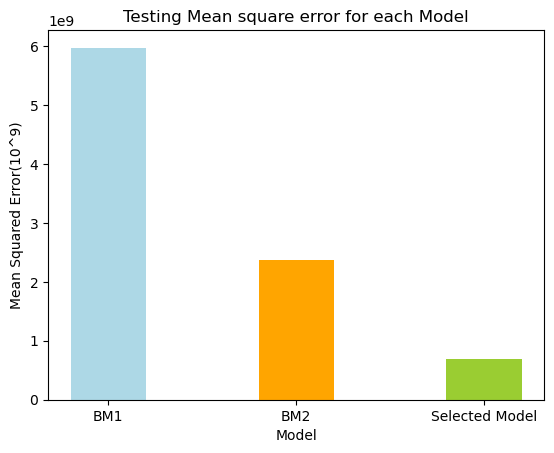

In [61]:
MSE_data = [BM1_MSE, BM2_MSE, Predict_Model_MSE]
MSE_Models = ['BM1', 'BM2', 'Selected Model']

plt.bar(MSE_Models,MSE_data,color =['lightblue', 'orange', 'yellowgreen'],width =0.4)
plt.title('Testing Mean square error for each Model')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error(10^9)')
plt.savefig('Testing MSE')